# DNA processing

In [ ]:
from pandas import read_csv
from scipy 

# compute the dimensions of the sampling core
def convert_methane(methane):
    # TODO: LaTeX of the unit conversion
    # umol/(m^2 * d) -> mmol/hr  via  * area (m^2) * (1 mmol/1000 umol) * (1 day / 24 hours)

    # defining the dimensions of the sampling system
    from math import pi
    sample_volume = 294.52 # cm^3
    sample_area = pi * (5/2)**2 # cm^2
    ## standard units
    sample_volume = sample_volume * 1e-6 # m^3
    sample_area = sample_area * 1e-4 # m^2

    # returning the mmol/hr methane fluxes
    return methane * sample_area * (1e3 / 24)

print(sample_volume, sample_area)

# load and connect the DNA with the methane flux
dna_df = read_csv("SaltPondsDNA.csv").set_index("Sample")
total_df = read_csv("data/Cliff_Sample_Metadata_BGC_NMR.csv").set_index("Sample")
methane = convert_methane(total_df["CH4_umol_m2_d"])
for sample in dna_df.index:
    dna_df.loc[sample, "methane"] = methane[sample]  # mmol/hr



# normalize the DNA/g by the methane flux
for sample in dna_df.index:
    dna_df.loc[sample, "CH4 (mmol/hr) / normalized_DNA"] = dna_df.loc[sample, "methane"] / dna_df.loc[sample, "DNA conc (µg/g soil)"]

# normalize to 1
# total_normalized_dna = dna_df.loc[:, "DNA/g/methane"].sum()
# dna_df["normalized DNA/g/methane"] = dna_df["DNA/g/methane"] / total_normalized_dna

display(dna_df)

dna_df.to_csv("SaltPondsDNA_methane_weighted.csv")
# display(methane)

0.00029452 0.001963495408493621


,DNA conc (µg/mL) in 20 µL extracted from 0.25 g soil,DNA (ug),DNA conc (µg/g soil),methane,CH4 (mmol/hr) / normalized_DNA
Sample,,,,,
R1_A_D1,60.266667,1.205333,4.821333,60.321851,12.511446
R1_A_D2,59.400000,1.188000,4.752000,60.321851,12.693992
R1_B_D1,54.133333,1.082667,4.330667,110.211815,25.449157
R1_B_D2,43.133333,0.862667,3.450667,110.211815,31.939282
R1_C_D1,20.866667,0.417333,1.669333,40.126483,24.037430
R1_C_D2,26.400000,0.528000,2.112000,40.126483,18.999282
R2_A_D1,49.933333,0.998667,3.994667,108.579660,27.181157
R2_A_D2,19.600000,0.392000,1.568000,108.579660,69.247232
R2_B_D1,2.000000,0.040000,0.160000,131.479743,821.748395


# abundances

In [ ]:
from pandas import read_csv

abundances = read_csv("data/Cliff_310MAG_relabund.txt", sep="\t")
display(abundances)
sample_totals = abundances.sum(axis=0)
display(sample_totals)
# relative_abundances = abundances / sample_totals
# display(relative_abundances)

# DNA density per sample versus methane emissions

In [6]:
unique_prefixes = {i: "_".join(i.split("_")[:-1]) for i in dna_df.index}
prefixes_set = set(unique_prefixes.values())
display(unique_prefixes, prefixes_set)

{'R1_A_D1': 'R1_A',
 'R1_A_D2': 'R1_A',
 'R1_B_D1': 'R1_B',
 'R1_B_D2': 'R1_B',
 'R1_C_D1': 'R1_C',
 'R1_C_D2': 'R1_C',
 'R2_A_D1': 'R2_A',
 'R2_A_D2': 'R2_A',
 'R2_B_D1': 'R2_B',
 'R2_B_D2': 'R2_B',
 'R2_C_D1': 'R2_C',
 'R2_C_D2': 'R2_C',
 'R2A_A_D1': 'R2A_A',
 'R2A_A_D2': 'R2A_A',
 'R2A_B_D1': 'R2A_B',
 'R2A_B_D2': 'R2A_B',
 'R2A_C_D1': 'R2A_C',
 'R2A_C_D2': 'R2A_C',
 'SF2_A_D1': 'SF2_A',
 'SF2_A_D2': 'SF2_A',
 'SF2_B_D1': 'SF2_B',
 'SF2_B_D2': 'SF2_B',
 'SF2_C_D1': 'SF2_C',
 'SF2_C_D2': 'SF2_C'}

{'R1_A',
 'R1_B',
 'R1_C',
 'R2A_A',
 'R2A_B',
 'R2A_C',
 'R2_A',
 'R2_B',
 'R2_C',
 'SF2_A',
 'SF2_B',
 'SF2_C'}

In [7]:
from pandas import read_csv
dna_df = read_csv("data/SaltPondsDNA.csv").set_index("Sample")
total_df = read_csv("data/Cliff_Sample_Metadata_BGC_NMR.csv").set_index("Sample").drop(columns=["New_index", "Unnamed: 0"])

# display(dna_df, total_df)
dna_samples, methane_samples = dna_df["DNA conc (µg/g soil)"].align(total_df["CH4_umol_m2_d"])
# display(dna_samples, methane_samples)


def merge_depths_by_vol(dic):
    merged_depths = {}
    for prefix in prefixes_set:
        D1, D2 = prefix+"_D1", prefix+"_D2"
        merged_depths[prefix] = (dic[D1] + 2*dic[D2]) / 3
    return merged_depths  
            

merged_dna_samples = merge_depths_by_vol(dna_samples)
merged_methane_samples = merge_depths_by_vol(methane_samples)
display(merged_dna_samples, merged_methane_samples)

{'R2A_C': 1.1555555556666668,
 'R2A_A': 1.7123555556666668,
 'R2_B': 1.9235555553333334,
 'SF2_A': 1.1697777776666667,
 'R2A_B': 0.9326222223333334,
 'SF2_B': 0.8177777776666666,
 'R1_C': 1.9644444443333333,
 'R2_A': 2.376888889,
 'R2_C': 1.2405333336666666,
 'R1_A': 4.775111111,
 'SF2_C': 0.4867555553333333,
 'R1_B': 3.744000000333333}

{'R2A_C': -7.099999999999999,
 'R2A_A': -24.3,
 'R2_B': 1607.09,
 'SF2_A': 4.43,
 'R2A_B': -1.76,
 'SF2_B': 41.45,
 'R1_C': 490.47,
 'R2_A': 1327.18,
 'R2_C': 1588.57,
 'R1_A': 737.32,
 'SF2_C': 10.5,
 'R1_B': 1347.13}

[[  -7.1 ]
 [ -24.3 ]
 [1607.09]
 [   4.43]
 [  -1.76]
 [  41.45]
 [ 490.47]
 [1327.18]
 [1588.57]
 [ 737.32]
 [  10.5 ]
 [1347.13]] [1.15555556 1.71235556 1.92355556 1.16977778 0.93262222 0.81777778
 1.96444444 2.37688889 1.24053333 4.77511111 0.48675556 3.744     ]


/tmp/ipykernel_1743671/131925520.py:62: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


[[1.15555556]
 [1.71235556]
 [1.92355556]
 [1.16977778]
 [0.93262222]
 [0.81777778]
 [1.96444444]
 [2.37688889]
 [1.24053333]
 [4.77511111]
 [0.48675556]
 [3.744     ]] [  -7.1   -24.3  1607.09    4.43   -1.76   41.45  490.47 1327.18 1588.57
  737.32   10.5  1347.13]


/tmp/ipykernel_1743671/131925520.py:62: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


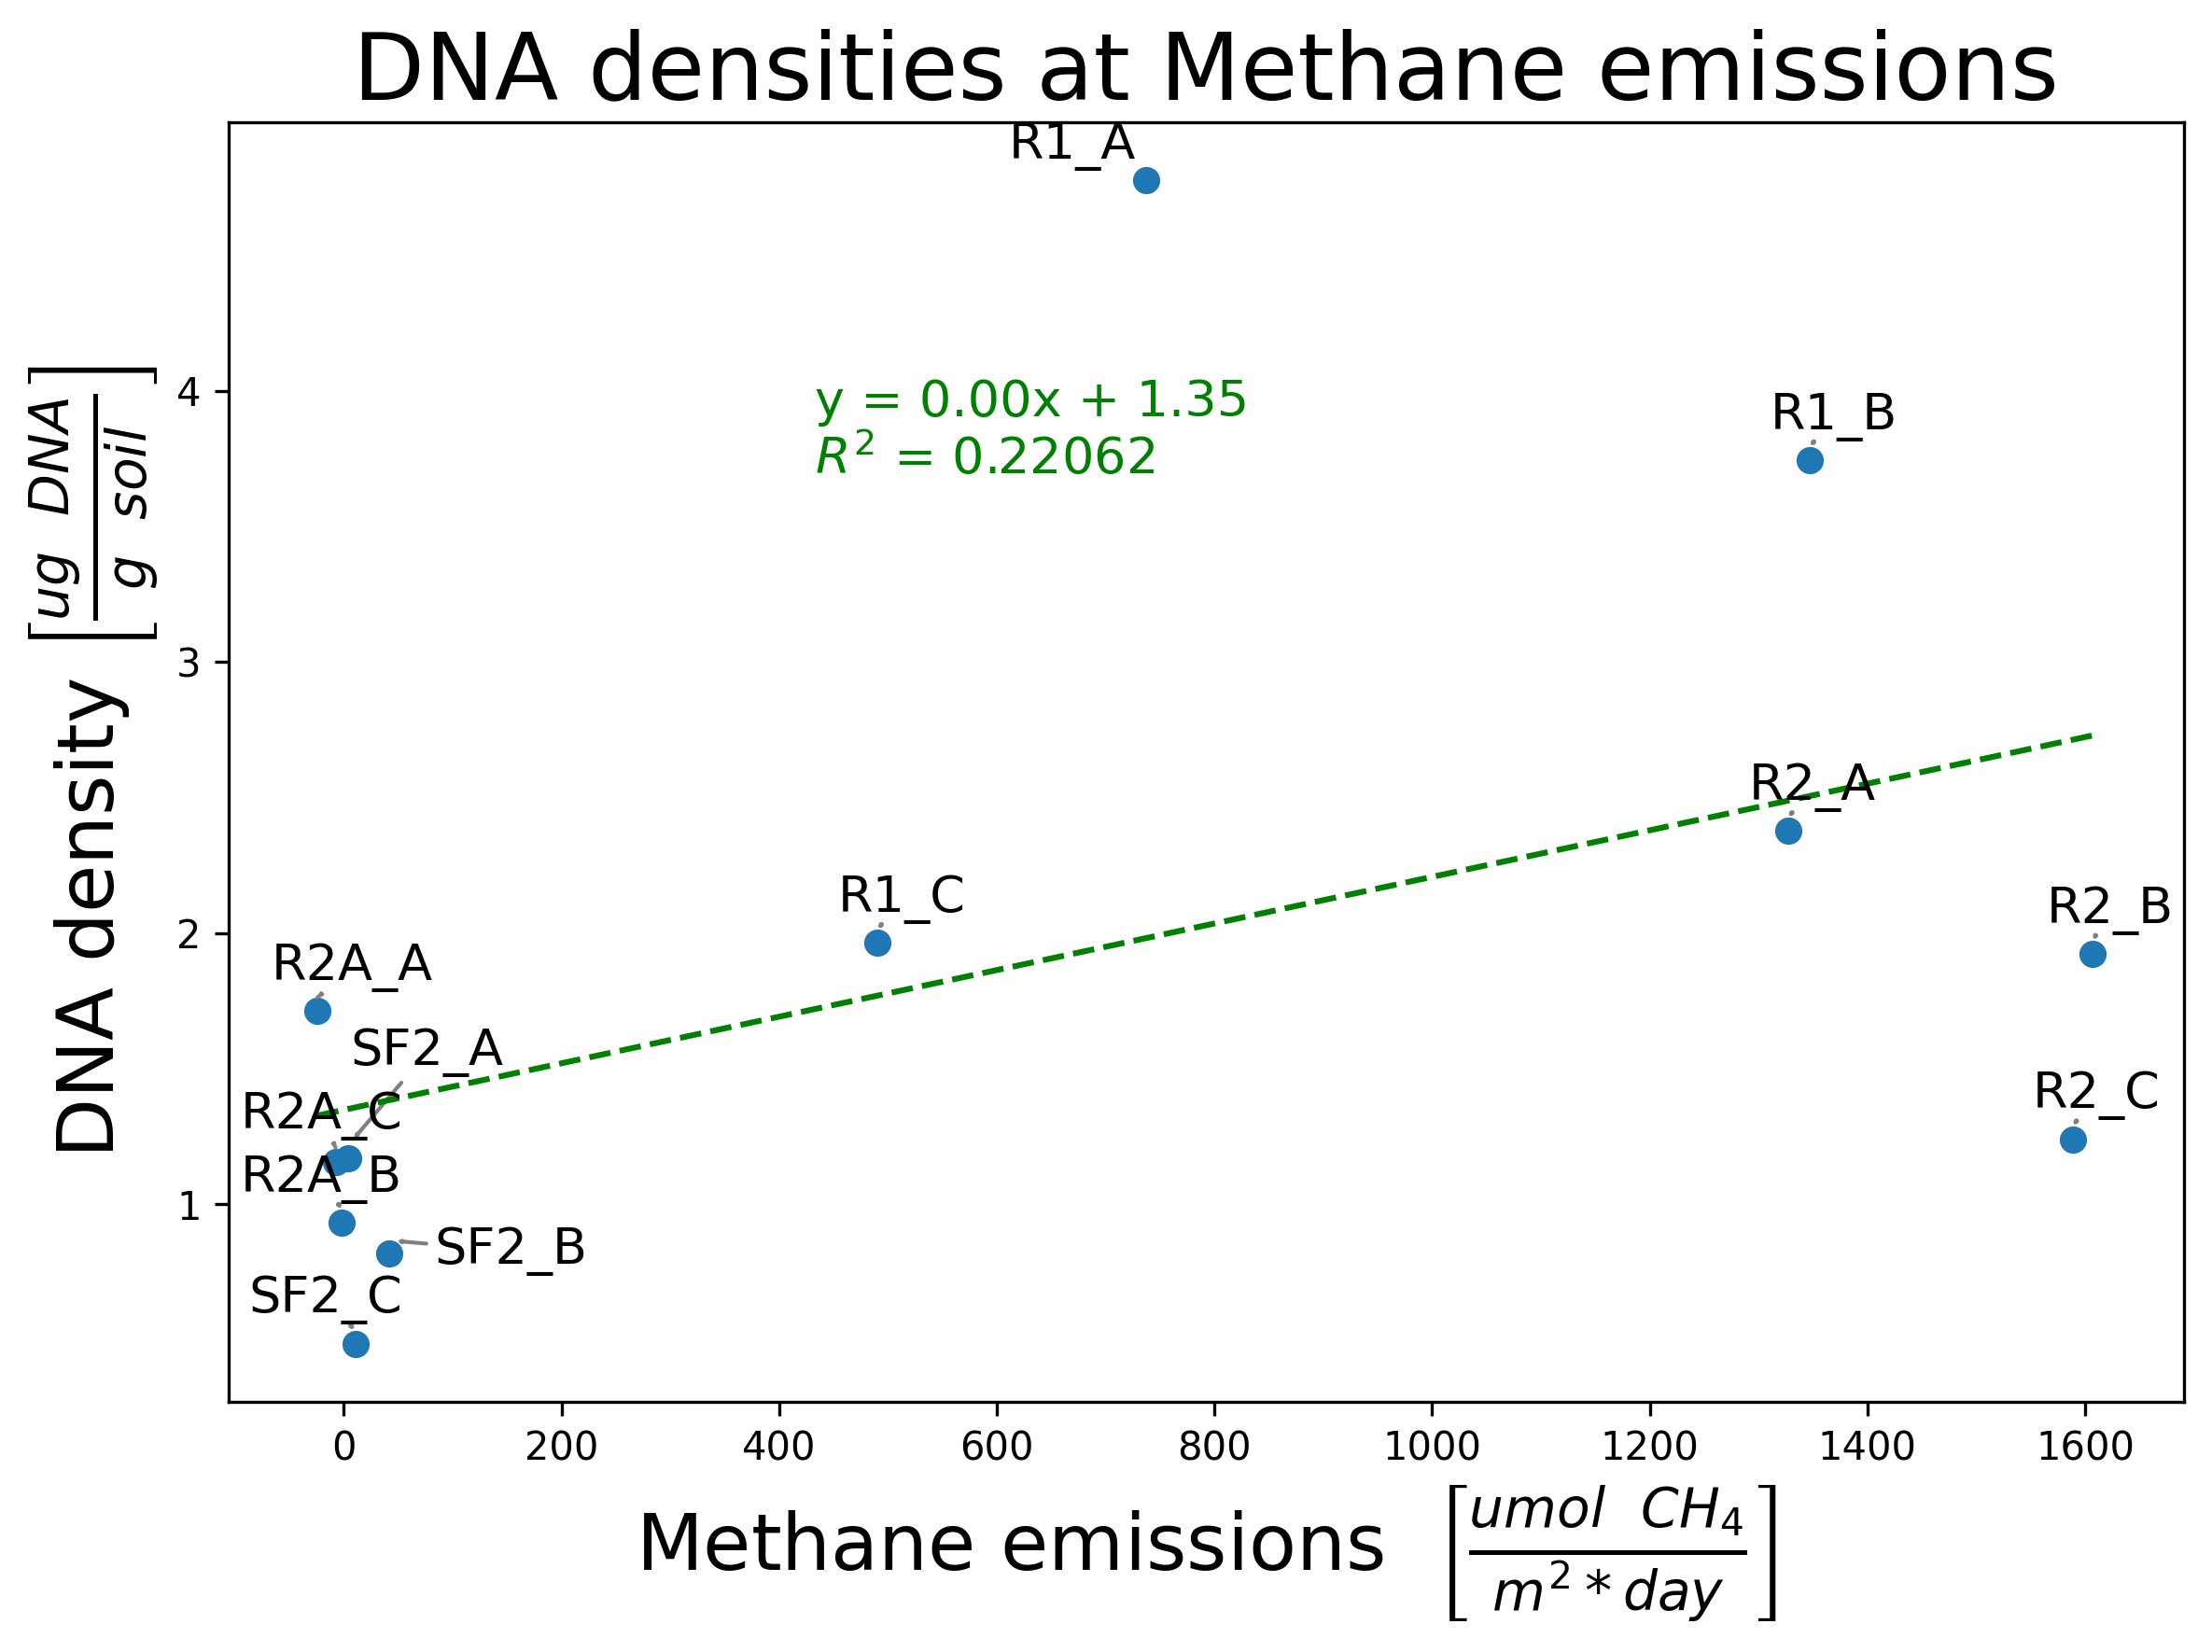

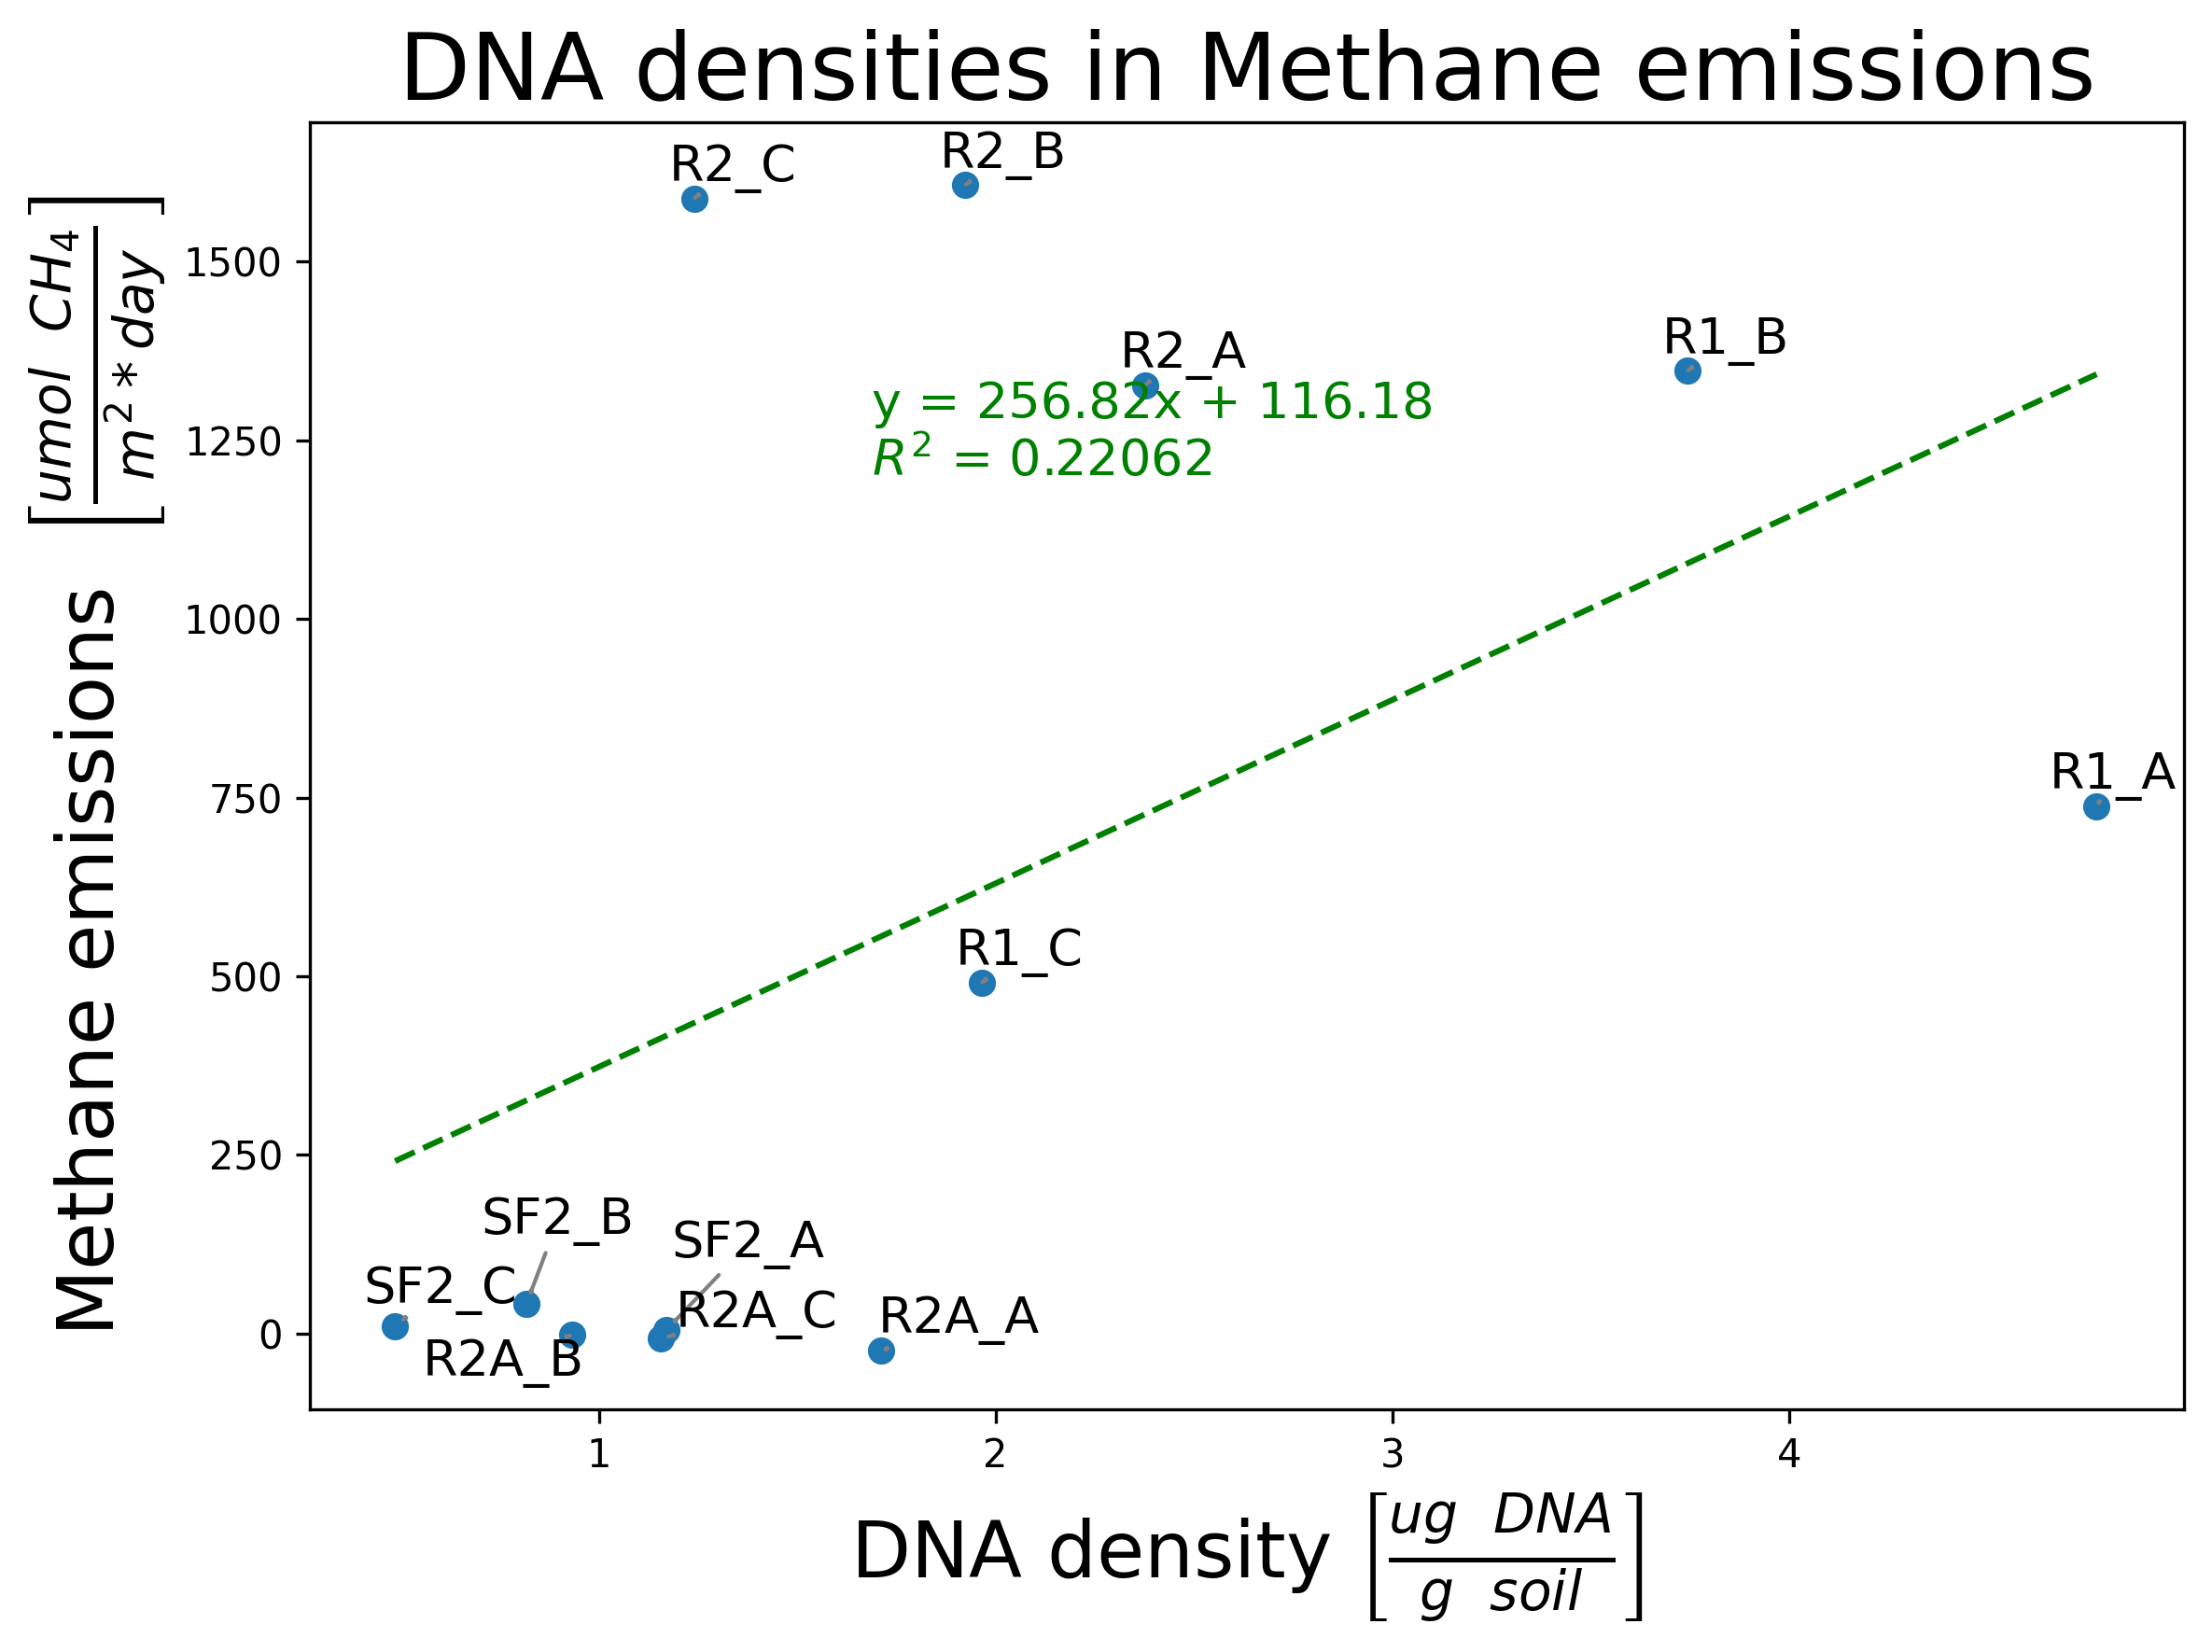

In [33]:
# correlate the DNA concentrations with methane fluxes
import matplotlib.pyplot as plt
from seaborn import color_palette
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from adjustText import adjust_text


# plot the figure
for methane_x in [True, False]:
    if methane_x:
        xs_og = np.array([v for k,v in merged_methane_samples.items()]) # if "R2" in k or "R1" in k])
        xs = xs_og.reshape(-1, 1)
        ys = np.array([v for k,v in merged_dna_samples.items()]) # if "R2" in k or "R1" in k])
        x_label = r'Methane emissions  $\left[\frac{umol~~CH_4}{m^2*day}\right]$'
        y_label = r'DNA density $\left[\frac{ug~~DNA}{g~~soil}\right]$'
        title = r"DNA densities at Methane emissions"
        output_label = "methane_v_DNA.png"
    else:
        xs_og = np.array([v for k,v in merged_dna_samples.items()]) # if "R2" in k or "R1" in k])
        xs = xs_og.reshape(-1, 1)
        ys = np.array([v for k,v in merged_methane_samples.items()]) # if "R2" in k or "R1" in k])
        y_label = r'Methane emissions  $\left[\frac{umol~~CH_4}{m^2*day}\right]$'
        x_label = r'DNA density $\left[\frac{ug~~DNA}{g~~soil}\right]$'
        title = r"DNA densities in Methane emissions"
        output_label = "DNA_v_methane.png"
    fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

    print(xs, ys)

    mdl = LinearRegression()
    mdl.fit(xs, ys)
    ax.scatter(xs, ys)
    offset = .05
    label_size = 13
    texts = []
    for xi, yi, label in zip(xs, ys, list(merged_methane_samples.keys())):
        texts.append(plt.text(xi, yi + offset, label, fontsize=label_size, ha='center', va='bottom'))
    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

    # add the regression
    y_pred = mdl.predict(xs)
    trendline_color = "green"
    sorted_idx = np.argsort(xs_og)
    sorted_xs = xs[sorted_idx]
    sorted_ys = y_pred[sorted_idx]
    ax.plot(sorted_xs, sorted_ys, color=trendline_color, linestyle='--', label='Trendline')

    ## create the equation for the plot
    eq = f"y = {mdl.coef_[0]:.2f}x + {mdl.intercept_:.2f}"
    r2_text = f"$R^2$ = {r2_score(ys, y_pred):.5f}"

    # Add labels and title
    ax.text(0.3, 0.8, eq + '\n' + r2_text, transform=plt.gca().transAxes, fontsize=label_size, color=trendline_color, verticalalignment='top')
    axes_size = 20
    plt.xlabel(x_label, fontsize=axes_size)
    plt.ylabel(y_label, fontsize=axes_size)
    plt.title(title, fontsize=axes_size+4)
    plt.tight_layout()
    fig.savefig(output_label)
    fig.show()
